In [1]:
"""This script is used to generate AUC for overlapping variants between eve and esm1b"""
import pandas as pd
import numpy as np
import os, sys

In [23]:
path = '/data/rozen/home/e0833634/variant_prediction/data/ucsf_download/content/ALL_hum_isoforms_ESM1b_LLR/'

In [2]:
df_clinvar_eve_overlaps = pd.read_csv('./data/metas/clinvar_eve_overlapped_genes.csv')
df_clinvar_eve_overlaps.drop(['GeneID','OtherIDs','NM_ID'], axis=1, inplace=True)
# convert 3 letter codes to 1 letter
amino_acids_dict = {'Ala': 'A', 'Arg': 'R', 'Asn': 'N', 'Asp': 'D', 'Cys': 'C', 'Glu': 'E', 'Gln': 'Q', 'Gly': 'G', 'His': 'H', 'Ile': 'I', 'Leu': 'L', 'Lys': 'K', 'Met': 'M', 'Phe': 'F', 'Pro': 'P', 'Ser': 'S', 'Thr': 'T', 'Trp': 'W', 'Tyr': 'Y', 'Val': 'V'}
df_clinvar_eve_overlaps['Amino_acids_before'] = df_clinvar_eve_overlaps['Amino_acids_before_3letters'].map(amino_acids_dict)
df_clinvar_eve_overlaps['Amino_acids_after'] = df_clinvar_eve_overlaps['Amino_acids_after_3letters'].map(amino_acids_dict)
#df_subset.drop(['Amino_acids_after_3letters', 'Amino_acids_before_3letters', 'Amino_acids_before', 'Amino_acids_after'], axis=1, inplace=True)
df_clinvar_eve_overlaps.dropna(inplace=True)
df_clinvar_eve_overlaps = df_clinvar_eve_overlaps.sort_values(by='UniProtKB-ID').reset_index()

In [3]:
df_clinvar_eve_overlaps

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56508,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R
56509,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M
56510,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D
56511,51019,NM_020928.2(ZSWIM6):c.1672G>C (p.Gly558Arg),ZSWIM6,Benign,1672,G/C,Gly558Arg,Gly,558,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,G,R


In [10]:
# get uniprotkb names used by ucsf
uniprotkb_used_ucsf = []
ucsf_variant_path = './data/ucsf_download/content/ALL_hum_isoforms_ESM1b_LLR/'
for file in os.listdir(ucsf_variant_path):
    uniprotkb_used_ucsf.append(os.path.splitext(file)[0].split('_')[0])
len(uniprotkb_used_ucsf)

42287

In [12]:
# uniprotkb cross mappings between esm1b published and clinvar treatment
uniprotkb_uniparc_mappings_general = pd.read_csv('./data/metas/unipac_uniprot_mapping.csv')
uniprotkb_uniparc_mappings_general

,UniProtKB-AC,ID
0,P31946-1,UPI000013C714
1,P31946-2,UPI000059C8F6
2,P31946,UPI000013C714
3,P62258-2,UPI00001E6021
4,P62258-1,UPI0000021A46
...,...,...
239679,Q5ZEY9,UPI0000450360
239680,V9H1E3,UPI000011E201
239681,B4E0L3,UPI00017A8581
239682,Q59FC1,UPI00004F6D35


In [14]:
ucsf_used_uniparc = uniprotkb_uniparc_mappings_general.loc[uniprotkb_uniparc_mappings_general['UniProtKB-AC'].isin(uniprotkb_used_ucsf)]
ucsf_used_uniparc

,UniProtKB-AC,ID
1,P31946-2,UPI000059C8F6
2,P31946,UPI000013C714
3,P62258-2,UPI00001E6021
5,P62258,UPI0000021A46
6,Q04917,UPI000013CC64
...,...,...
53051,O43149,UPI00004569F7
53052,Q8IYH5-3,UPI0000205B11
53053,Q8IYH5-2,UPI000150AF3D
53055,Q8IYH5-4,UPI0000EE32BF


In [18]:
i_used_uniparc = pd.read_csv('./data/metas/unipac_uniprot_rmdup.csv')
to_map = pd.merge(ucsf_used_uniparc, i_used_uniparc, how='left', on='ID')
to_map

,UniProtKB-AC_x,ID,UniProtKB-AC_y
0,P31946-2,UPI000059C8F6,P31946-2
1,P31946,UPI000013C714,P31946
2,P62258-2,UPI00001E6021,P62258-2
3,P62258,UPI0000021A46,P62258
4,Q04917,UPI000013CC64,A0A024R1K7
...,...,...,...
42206,O43149,UPI00004569F7,O43149
42207,Q8IYH5-3,UPI0000205B11,Q8IYH5-3
42208,Q8IYH5-2,UPI000150AF3D,Q8IYH5-2
42209,Q8IYH5-4,UPI0000EE32BF,Q8IYH5-4


In [29]:
mapping_dict = to_map.set_index('UniProtKB-AC_y')['UniProtKB-AC_x'].to_dict()
mapping_dict

{'P31946-2': 'P31946-2',
 'P31946': 'P31946',
 'P62258-2': 'P62258-2',
 'P62258': 'P62258',
 'A0A024R1K7': 'Q04917',
 'P61981': 'P61981',
 'P31947-2': 'P31947-2',
 'P31947': 'P31947',
 'P27348': 'P27348',
 'P63104-2': 'P63104-2',
 'D0PNI1': 'P63104',
 'Q96QU6-2': 'Q96QU6-2',
 'A0A0S2Z622': 'Q96QU6',
 'Q4AC99': 'Q4AC99',
 'Q15172-2': 'Q15172-2',
 'Q15172': 'Q15172',
 'Q15173-2': 'Q15173-2',
 'A0A024R593': 'Q15173',
 'Q14738-2': 'Q14738-2',
 'Q14738-3': 'Q14738-3',
 'A0A024RD11': 'Q14738',
 'Q16537-2': 'Q16537-2',
 'Q16537-3': 'Q16537-3',
 'Q16537': 'Q16537',
 'Q13362-3': 'Q13362-3',
 'Q13362-5': 'Q13362-5',
 'Q13362-4': 'Q13362-4',
 'Q13362-2': 'Q13362-2',
 'Q13362': 'Q13362',
 'A8K7B7': 'P30153',
 'P30154-2': 'P30154-2',
 'P30154-3': 'P30154-3',
 'P30154-5': 'P30154-5',
 'P30154-4': 'P30154-4',
 'P30154': 'P30154',
 'P63151-2': 'P63151-2',
 'A0A140VJT0': 'P63151',
 'Q00005-4': 'Q00005-4',
 'Q00005-3': 'Q00005-3',
 'Q00005-7': 'Q00005-7',
 'Q00005-2': 'Q00005-2',
 'Q00005-6': 'Q00005-6'

In [30]:
print(len(mapping_dict))

42117


In [19]:
ucsf_have_scores_list = to_map['UniProtKB-AC_y'].tolist()

In [17]:
diff = set(uniprotkb_used_ucsf) - set(ucsf_used_uniparc['UniProtKB-AC'].tolist())
diff

{'000',
 'A0A087WX78',
 'A2RUG3',
 'A6NE21',
 'A6NEW6',
 'A6NEY3',
 'A6NIL9',
 'A6NLF2',
 'A8K830-2',
 'A8MVS1',
 'A8MYX2',
 'C9J442',
 'H0YL09',
 'O15417-3',
 'O94854-2',
 'P0C7X5',
 'P0DN24',
 'P22455-3',
 'P29973-2',
 'P35544',
 'P40855-5',
 'P57052-2',
 'Q15884-2',
 'Q3SY89',
 'Q4V328-3',
 'Q5H9F3-2',
 'Q5XKL5-2',
 'Q6GMV1',
 'Q6P3W6-2',
 'Q6ZMK1',
 'Q6ZMK1-2',
 'Q6ZMK1-3',
 'Q6ZMK1-4',
 'Q6ZRZ4',
 'Q6ZRZ4-2',
 'Q6ZW33',
 'Q7Z4U5',
 'Q7Z4U5-3',
 'Q86TS7',
 'Q86VP3-3',
 'Q86VZ6-2',
 'Q8N1N5',
 'Q8N6G1',
 'Q8NFD5-4',
 'Q8NG57',
 'Q8WTZ3',
 'Q8WV35',
 'Q96AX9-11',
 'Q96AX9-12',
 'Q96AX9-13',
 'Q96AX9-14',
 'Q96AX9-2',
 'Q96KH6',
 'Q96NR2',
 'Q96Q06-2',
 'Q99576-4',
 'Q9BWV1-2',
 'Q9BY12-2',
 'Q9BYK8-4',
 'Q9BZG8-3',
 'Q9C000-6',
 'Q9C000-7',
 'Q9C0E4-3',
 'Q9NPJ8-2',
 'Q9NY84',
 'Q9NY84-3',
 'Q9NY84-4',
 'Q9NY84-5',
 'Q9NY84-6',
 'Q9NY84-7',
 'Q9NY84-8',
 'Q9UBB6-3',
 'Q9UJ94',
 'Q9ULJ6-2',
 'Q9UPP5',
 'Q9UPP5-2'}

In [20]:
df_eve_covered = pd.read_csv('./data/eve_related/clinvar_eve_overlaps_only_bp.csv')
df_eve_covered

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.969010,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.675560,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,Q9HCJ5,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign
38086,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
38087,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.121800,Benign
38088,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign


In [21]:
df_eve_covered = df_eve_covered[df_eve_covered['UniProtKB-AC'].isin(ucsf_have_scores_list)]
df_eve_covered

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.969010,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.675560,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38085,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,Q9HCJ5,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign
38086,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
38087,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.121800,Benign
38088,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign


In [46]:
variant_meta = {}
for index, row in df_eve_covered.iterrows():
    r, c = row['Amino_acids_after'], row['Amino_acids_before']+' '+str(row['Protein_positions'])
    try:
        acc = row['UniProtKB-AC']
        acc_to_retrieve = mapping_dict[acc]
        df = pd.read_csv(path+acc_to_retrieve+'_LLR.csv', index_col=0)
        variant_meta[index] = {'uniprot_acc' : acc_to_retrieve,
                            'scores': df.loc[r][c],
                            'variant': c+'_'+r,
                               'index': row['index']
                            }
    except (KeyError, FileNotFoundError):
        pass
variant_meta

{0: {'uniprot_acc': 'P61981',
  'scores': -12.22,
  'variant': 'L 93_F',
  'index': 47045},
 1: {'uniprot_acc': 'P61981',
  'scores': -16.453,
  'variant': 'D 228_V',
  'index': 24599},
 2: {'uniprot_acc': 'P61981',
  'scores': -10.352,
  'variant': 'D 228_N',
  'index': 24598},
 3: {'uniprot_acc': 'P61981',
  'scores': -13.768,
  'variant': 'Y 133_C',
  'index': 24597},
 4: {'uniprot_acc': 'P61981',
  'scores': -11.441,
  'variant': 'R 132_H',
  'index': 24596},
 5: {'uniprot_acc': 'P61981',
  'scores': -11.859,
  'variant': 'R 132_C',
  'index': 24595},
 6: {'uniprot_acc': 'P61981',
  'scores': -14.449,
  'variant': 'D 129_E',
  'index': 24594},
 7: {'uniprot_acc': 'P61981',
  'scores': -15.273,
  'variant': 'R 57_H',
  'index': 24593},
 8: {'uniprot_acc': 'P61981',
  'scores': -15.067,
  'variant': 'R 57_C',
  'index': 24592},
 9: {'uniprot_acc': 'P61981',
  'scores': -5.633,
  'variant': 'K 120_R',
  'index': 47047},
 10: {'uniprot_acc': 'P61981',
  'scores': -5.887,
  'variant': '

In [47]:
df_var = pd.DataFrame.from_dict(variant_meta, orient='index')
df_var

,uniprot_acc,scores,variant,index
0,P61981,-12.220,L 93_F,47045
1,P61981,-16.453,D 228_V,24599
2,P61981,-10.352,D 228_N,24598
3,P61981,-13.768,Y 133_C,24597
4,P61981,-11.441,R 132_H,24596
...,...,...,...,...
38085,Q9HCJ5,0.239,P 615_H,51021
38086,Q9HCJ5,-10.428,C 246_R,51044
38087,Q9HCJ5,-4.398,V 636_M,51023
38088,Q9HCJ5,-3.435,E 652_D,51024


In [50]:
df_test = pd.merge(df_eve_covered, df_var, how='left', on='index')
df_test

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,...,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels,uniprot_acc,scores,variant
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,...,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic,P61981,-12.220,L 93_F
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,...,1433G_HUMAN,1,Pathogenic,D,V,0.969010,Pathogenic,P61981,-16.453,D 228_V
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,...,1433G_HUMAN,1,Pathogenic,D,N,0.675560,Pathogenic,P61981,-10.352,D 228_N
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,...,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic,P61981,-13.768,Y 133_C
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,...,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic,P61981,-11.441,R 132_H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38071,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,...,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign,Q9HCJ5,0.239,P 615_H
38072,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,...,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign,Q9HCJ5,-10.428,C 246_R
38073,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,...,ZSWM6_HUMAN,1,Benign,V,M,0.121800,Benign,Q9HCJ5,-4.398,V 636_M
38074,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,...,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign,Q9HCJ5,-3.435,E 652_D


In [51]:
df_test.drop(['uniprot_acc'], axis=1, inplace=True)
df_test.to_csv('./data/eve_related/clinvar_eve_esm1b_overlaps_bponly.csv')

In [52]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(df_test['classes'], df_test['scores'], pos_label='Benign')

In [53]:
auc(fpr,tpr)

0.9274031266275602

In [54]:
df_test['scores'].unique()

array([-12.22 , -16.453, -10.352, ...,  -7.504,   0.239,  -3.435])

In [55]:
print(len(thresholds))

11927


In [56]:
# set the desired FPR threshold
desired_fpr = 0.05
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]
threshold

-5.866

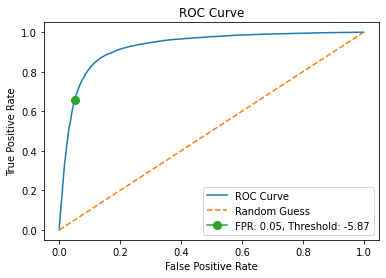

In [57]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [58]:
# compute the minimum and maximum values of column A
min_value = df_test['scores'].min()
max_value = df_test['scores'].max()

# scale the values in column A to the range of 0-1
df_test['scores_esm1b_scaled'] = (df_test['scores'] - min_value) / (max_value - min_value)
df_test

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,...,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels,scores,variant,scores_esm1b_scaled
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,...,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic,-12.220,L 93_F,0.299425
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,...,1433G_HUMAN,1,Pathogenic,D,V,0.969010,Pathogenic,-16.453,D 228_V,0.180737
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,...,1433G_HUMAN,1,Pathogenic,D,N,0.675560,Pathogenic,-10.352,D 228_N,0.351801
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,...,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic,-13.768,Y 133_C,0.256021
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,...,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic,-11.441,R 132_H,0.321267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38071,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,...,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign,0.239,P 615_H,0.648759
38072,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,...,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign,-10.428,C 246_R,0.349671
38073,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,...,ZSWM6_HUMAN,1,Benign,V,M,0.121800,Benign,-4.398,V 636_M,0.518744
38074,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,...,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign,-3.435,E 652_D,0.545745


In [59]:
fpr, tpr, thresholds = roc_curve(df_test['classes'], df_test['scores_esm1b_scaled'], pos_label='Benign')
auc(fpr,tpr)

0.9274031266275602

In [60]:
# set the desired FPR threshold
desired_fpr = 0.05
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]
threshold

0.4775830646291883

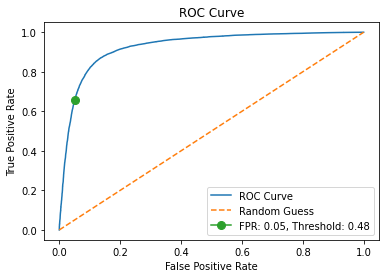

In [61]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [62]:
fpr, tpr, thresholds = roc_curve(df_test['classes'], df_test['eve_scores'], pos_label='Pathogenic')
auc(fpr,tpr)

0.9179575829217004

In [63]:
# set the desired FPR threshold
desired_fpr = 0.05
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]
threshold

0.7603191878658035

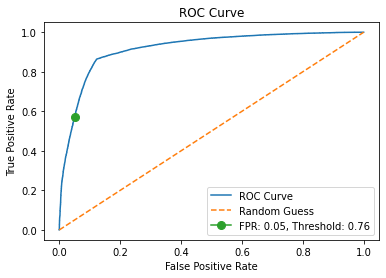

In [64]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()